##### 问题描述

大家好，我们在用 networkx 显示中文的时候，会发现不能显示中文。 

##### 解决办法

1. 下载Github仓库中的字体SimHei.ttf； 
2. 在 jupyter notebook 中执行
```python
import matplotlib
print(matplotlib.__path__)
```
找到 matplotlib 的路径，然后 cd 到这个路径。 cd 到这个路径之后，继续 cd，cd 到 mpl-data/fonts/ttf 这个路径。 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

```bash
$ mv SimHei.ttf DejaVuSans.ttf
```

其中，用到的 ttf 字体。 我给大家传到附件上了。 

Previous Course

$$ pr(w) $$

## Out of Vocabulary(OOV)

Pr(w_o) = constant < Pr(w_1)

## Language Model: Smooth

In [6]:
import random, matplotlib
matplotlib.__path__

['C:\\Users\\Administrator\\Anaconda3\\lib\\site-packages\\matplotlib']

## Search Policy

In [7]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [8]:
city_location = {
    '香港': (114.17, 22.28)
}

Input: String -> dict

In [9]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]},"
test_string_2 = "\\{name:'兰州', geoCoord:[103.73, 36.03]},"

In [10]:
import re

In [11]:
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [12]:
pattern.findall(test_string)

[('兰州', '103.73', '36.03')]

In [13]:
pattern.findall(test_string_2)

[('兰州', '103.73', '36.03')]

In [14]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
    
    # following: we find the city info
    
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [15]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [16]:
import math

In [17]:
# 非准确的四舍五入：官方解释：if two multiples are equally close, rounding is done toward the even choice；
# 即出现向上向下距离相同的情况（也就是5）时，取整的结果向结果为偶数方向调整。所以1.5取整为2,2.5取整也为2.
print(round(1.5))
print(round(-0.5))
print(round(1.6))
print(round(1.4))
print(round(2.5))
print(round(2.513,2))

2
0
2
1
2
2.51


In [18]:
# 向下取整
math.floor(3.9)

3

In [19]:
# 向上取整
math.ceil(3.1)

4

In [20]:
# 不关心实现细节，当API用就完事儿了
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [21]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [22]:
get_geo_distance('上海', '西藏')

3377.0202577893624

In [23]:
import networkx as nx

In [28]:
city_graph = nx.Graph()
city_graph

In [25]:
city_graph.add_nodes_from(list(city_location.keys()))

In [26]:
%matplotlib inline

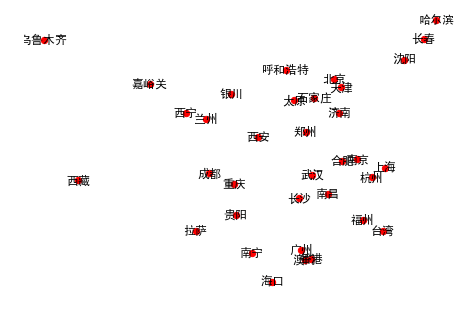

In [23]:
nx.draw(city_graph, city_location, with_labels=True, node_size=40)

In [24]:
from collections import defaultdict
threshold = 300

In [25]:
city_connection = defaultdict(list)

In [28]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
        
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
#             print(f"{c1}, {c2}, {distance}")
#             remove the same place values in one key
            if c2 not in city_connection[c1]:
                city_connection[c1].append(c2)
            if c1 not in city_connection[c2]:
                city_connection[c2].append(c1)

In [29]:
city_connection

defaultdict(list,
            {'香港': ['广州', '长沙', '澳门'],
             '广州': ['香港', '长沙', '澳门'],
             '长沙': ['香港', '武汉', '郑州', '广州', '澳门'],
             '澳门': ['香港', '广州', '长沙'],
             '兰州': ['西宁', '成都', '银川'],
             '西宁': ['兰州', '成都', '拉萨'],
             '成都': ['兰州', '西宁', '拉萨', '重庆'],
             '银川': ['兰州', '重庆'],
             '拉萨': ['西宁', '成都'],
             '重庆': ['成都', '贵阳', '银川'],
             '石家庄': ['郑州', '济南', '太原', '北京'],
             '郑州': ['石家庄', '武汉', '长沙', '太原'],
             '济南': ['石家庄', '合肥', '北京', '天津'],
             '太原': ['石家庄', '郑州', '呼和浩特'],
             '北京': ['石家庄', '济南', '天津'],
             '贵阳': ['重庆', '南宁'],
             '南宁': ['贵阳', '海口'],
             '武汉': ['郑州', '南昌', '长沙'],
             '南昌': ['武汉', '合肥'],
             '合肥': ['济南', '南京', '南昌'],
             '天津': ['济南', '北京'],
             '南京': ['合肥', '杭州'],
             '杭州': ['南京', '福州', '上海'],
             '福州': ['杭州', '台湾'],
             '上海': ['杭州'],
             '台湾': ['福州'

In [30]:
city_with_road = nx.Graph(city_connection)

C:\Users\Administrator\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


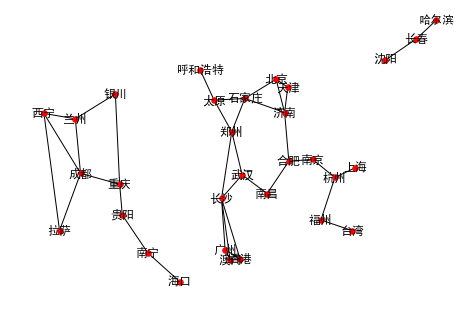

In [31]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [101]:
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [102]:
simple_connection_info = defaultdict(list)
simple_connection_info

defaultdict(list, {})

In [104]:
simple_connection_info.update(simple_connection_info_src)
simple_connection_info
defaultdict?

Init signature: defaultdict(self, /, *args, **kwargs)
Docstring:     
defaultdict(default_factory[, ...]) --> dict with default factory

The default factory is called without arguments to produce
a new value when a key is not present, in __getitem__ only.
A defaultdict compares equal to a dict with the same items.
All remaining arguments are treated the same as if they were
passed to the dict constructor, including keyword arguments.
File:           c:\users\administrator\anaconda3\lib\collections\__init__.py
Type:           type
Subclasses:     Quoter


In [82]:
def bfs(graph, start):
    """
    breadth first search
    """
    visited = [start]
    seen = set()
    
    while visited:
        frontier = visited.pop()  
        if frontier in seen: continue
        
        for successor in graph[frontier]:
            if successor in seen: continue
                
            print(successor)
            
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(frontier)
    
    return seen

In [83]:
bfs(number_graph_3, 1)

2
3
4
5
6
7
8
9
11
10
12
13


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

![BFS](./BFS.gif)

In [79]:
# Not expected dfs
def dfs(graph, start):
    """
    depth first search
    """
    visited = [start]
    seen = set()
    
    while visited:
        frontier = visited.pop() 
        if frontier in seen: continue
        
        for successor in graph[frontier]:
            if successor in seen: continue
                
            print(successor)
            
            visited = visited + [successor] 
        seen.add(frontier)
    
    return seen

In [80]:
dfs(number_graph_3, 1)

2
3
6
11
10
13
4
5
9
7
8
12


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [77]:
# Expected dfs method.
dfs_seen = set()
def dfs_new(graph, start):
    dfs_seen.add(start)
    print(start)
    if len(graph[start]) == 1:
        return
    for successor in graph[start]:
        if successor in dfs_seen:
            continue
        dfs_new(graph, successor)
    return dfs_seen

![DFS的正确遍历](./DFS的正确姿势.gif)

In [78]:
dfs_new(number_graph_3, 1)

1
2
4
7
8
12
5
9
3
6
11
13
10


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [74]:
number_grpah = defaultdict(list)
number_graph_2 = defaultdict(list)

number_grpah.update({
    1: [2, 3],
    2: [1, 4], 
    3: [1, 5],
    4: [2, 6], 
    5: [3, 7],
    7: [5, 8]
})

G = {'A': ['B', 'C'],
     'B': ['A', 'D', 'E'],
     'C': ['A', 'F'],
     'D': ['B'],
     'E': ['B', 'F'],
     'F': ['C', 'E']}

number_graph_2.update({
    1: [2, 3],
    2: [1, 4, 5],
    3: [1, 6, 7],
    4: [2, 8, 9],
    5: [2, 10, 11],
    6: [3, 12, 13],
    7: [3, 14, 15],
    8: [4],
    9: [4],
    10: [5],
    11: [5],
    12: [6],
    13: [6],
    14: [7],
    15: [7]
    
})
number_graph_3 = {
    1: [2, 3],
    2: [1, 4, 5],
    3: [1, 6],
    4: [2, 7, 8],
    5: [2, 9],
    6: [3, 11, 10],
    7: [4],
    8: [4, 12],
    9: [5],
    10: [6],
    11: [6, 13],
    12: [8],
    13: [11]
}

In [42]:
simple_connection_info['西安']

['兰州', '长沙']

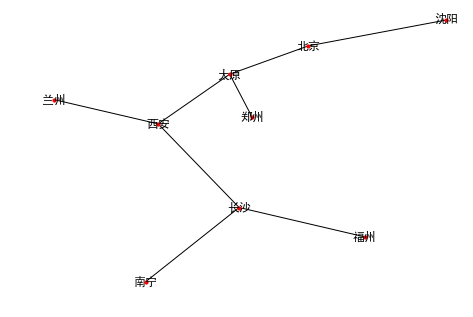

In [43]:
nx.draw(nx.Graph(simple_connection_info), city_location, with_labels=True, node_size=10)

In [4]:
# Return a found way from start to destination in a certain way.
# 该方法并未正确实现不同换乘策略，只通过广度优先实现最少换乘策略。
def search(start, destination, connection_graph, sort_candidate=shortest_path_first):
    paths = [[start]]
    
    visitied = set()
    
    while paths: # if we find existing pathes
        path = paths.pop(0)
        frontier = path[-1]
        
        if frontier in visitied: continue
        
        for city in connection_graph[frontier]:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]

            paths.append(new_path)
            
            if city == destination: 
                return new_path
        
        visitied.add(frontier)
        # 排序多余，paths中只有一条符合start->destination的路径时即被返回
        paths = sort_candidate(paths) # 我们可以加一个排序函数 对我们的搜索策略进行控制
    return f"No way from {start} to {destination}."

In [222]:
def transfer_stations_first(paths): 
    return sorted(paths, key=len)

In [1]:
# 没有意义，对于数据集很大的如北京地铁换乘，其结果等于到某个站点的可能性的指数相乘
def transfer_as_much_possible(paths):
    return sorted(paths, key=len, reverse=True)

In [3]:
def shortest_path_first(paths):
    
    if len(paths) <= 1: return paths
    
    def get_path_distnace(path):
        distance = 0
        for i in range(1, len(path)):
            distance += get_geo_distance(path[i-1], path[i])
            
        return distance

    return sorted(paths, key=get_path_distnace)

In [226]:
pretty_print(search('北京', '广州', city_connection))

北京->石家庄->郑州->长沙->广州


In [225]:
pretty_print(search('北京', '广州', city_connection, transfer_stations_first))

北京->石家庄->郑州->长沙->广州


In [227]:
pretty_print(search('北京', '广州', city_connection, transfer_as_much_possible))

北京->石家庄->郑州->武汉->长沙->广州


In [141]:
search('兰州', '福州', simple_connection_info, sort_candidate=transfer_stations_first)

['兰州', '西安', '长沙', '福州']

In [166]:
def pretty_print(cities):
    if not isinstance(cities, str):
        print('->'.join(cities))
    else:
        print(cities)

In [154]:
pretty_print(search('北京', '福州', simple_connection_info, shortest_path_first))

北京->太原->西安->长沙->福州


In [169]:
pretty_print(search('北京', '香港', city_connection))

北京->石家庄->郑州->长沙->香港


In [189]:
pretty_print(search('北京', '兰州', city_connection))

北京->太原->西安->银川->兰州


In [171]:
pretty_print(search('银川', '海口', city_connection))

银川->重庆->贵阳->南宁->海口


In [147]:
pretty_print(search('北京', '长沙', city_connection))

北京->石家庄->郑州->长沙


## Assignment

1. 网络爬虫 + 正则
2. 数据处理
3. 算法的应用能力

In [1]:
import requests

In [2]:
url = 'https://movie.douban.com/subject/26931786/?from=showing'

In [3]:
response = requests.get(url)
# with open ('douban.txt', 'w', encoding='utf-8') as f:
#     f.write(response.text)

In [238]:
response
response.status_code

200

In [239]:
what_we_want = r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '

In [240]:
pattern = re.compile(what_we_want)

In [244]:
likes = pattern.findall(response.text)
len(likes)

10

In [242]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page
movie.douban.com/subject/3168101/?from=subject-page


## Machine Learning

In [8]:
from sklearn.datasets import load_boston
import sklearn

In [ ]:
a = sklearn.datasets
dir(a)

In [14]:
data = load_boston()
len(data)

5

In [15]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [67]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
data['DESCR'].split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [21]:
import numpy as np
x = np.arange(3, dtype='f')
x

array([0., 1., 2.], dtype=float32)

In [39]:
y = np.arange(3, dtype=np.uint8)
y

array([0, 1, 2], dtype=uint8)

In [44]:
y_f = y.astype(float)
y_f

array([0., 1., 2.])

In [48]:
y_f.dtype

dtype('float64')

In [49]:
X, y = data['data'], data['target']

In [53]:
X.shape

(506, 13)

In [54]:
y.shape

(506,)

In [56]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [59]:
X[:, 5].shape

(506,)

In [60]:
X[1]

array([2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
       6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
       1.7800e+01, 3.9690e+02, 9.1400e+00])

In [66]:
np.zeros((3,3))[:, 1:]

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [291]:
y[1]

21.6

In [293]:
len(X[:, 0])

506

In [294]:
len(y)

506

In [295]:
%matplotlib inline

In [ ]:
data['feature_names'][5]
# plt.scatter?

In [ ]:
plt.figure(figsize=[15,15])
test = {'a': np.arange(50), 'b': np.random.randint(0, 50, 50)}
plt.scatter('a', 'b', c = 'green', data=test)
plt.show()
# np.random.randint?

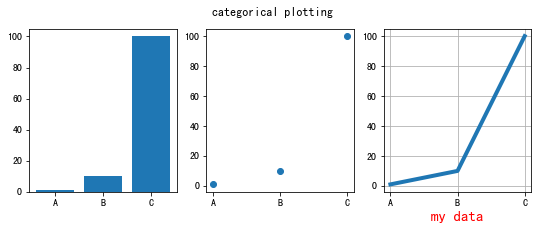

In [129]:
names = ['A', 'B', 'C']
values = [1, 10, 100]
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.bar(names, values)

plt.subplot(132)
plt.scatter(names, values)

plt.subplot(133)
plt.grid(True)
plt.xlabel('my data', fontsize=15, color='red')
plt.plot(names, values, linewidth=4.0)
plt.suptitle('categorical plotting')
plt.show()
# plt.subplot?

In [93]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

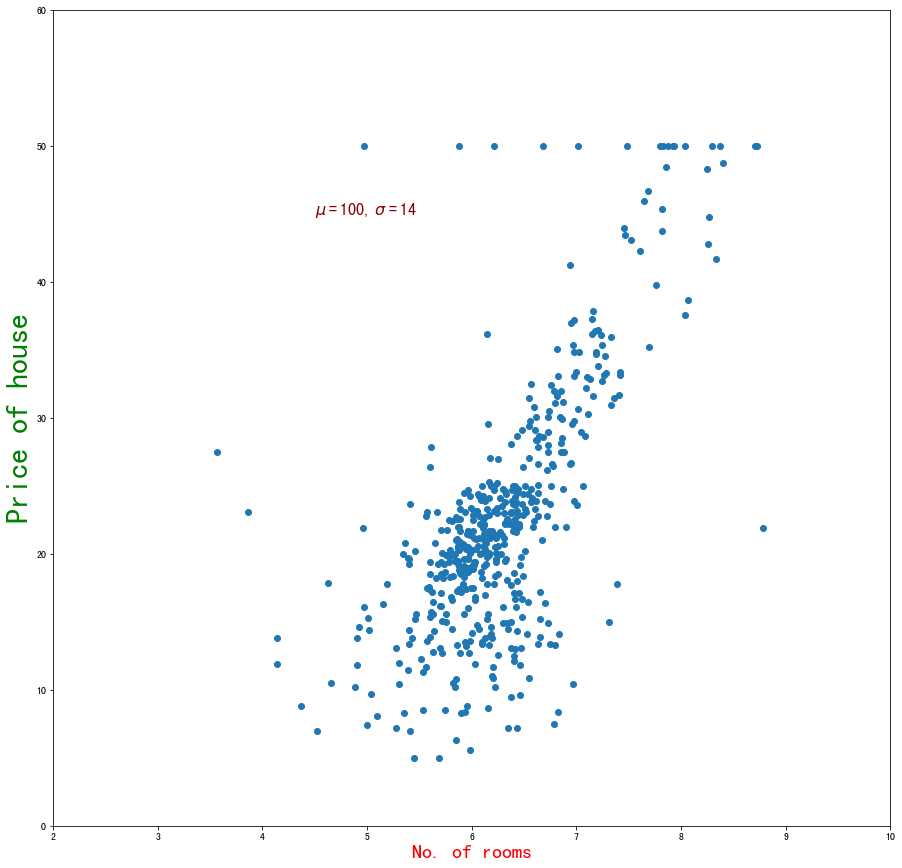

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,15])
plt.xlabel('No. of rooms', fontsize=20, color='red')
plt.ylabel('Price of house', fontsize=30, color='green')
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.text(4.5, 45, r'$\mu=100, \sigma=14$', fontdict=font)
plt.axis([2, 10, 0, 60])
draw_rm_and_price()

In [154]:
import random

In [155]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

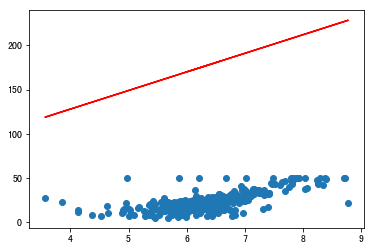

In [160]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.plot(X_rm, price_by_random_k_and_b, color='red')
plt.show()

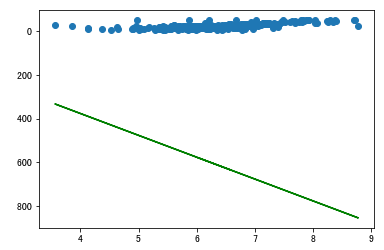

In [166]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.plot(X_rm, price_by_random_k_and_b, color='green')
plt.show()

$$ \hat{y} $$

In [281]:
list(y)

[3, 2, -1]

In [ ]:
price_by_random_k_and_b

In [268]:
[1, 1, 1]
[2, 2, 2] 

[2, 2, 2]

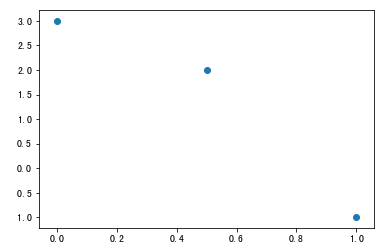

In [272]:
y = np.poly1d([3,2,-1])
x = np.linspace(0,1,3)
plt.scatter(x,y)

## loss

$$ loss\_square = \frac{1}{n} \sum{y_i - \hat{y_i})^2}$$

$$ loss\_abs = \frac{1}{n} \sum|{y_i - \hat{y_i}}| $$

In [303]:
def loss(y:list, y_hat:list): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

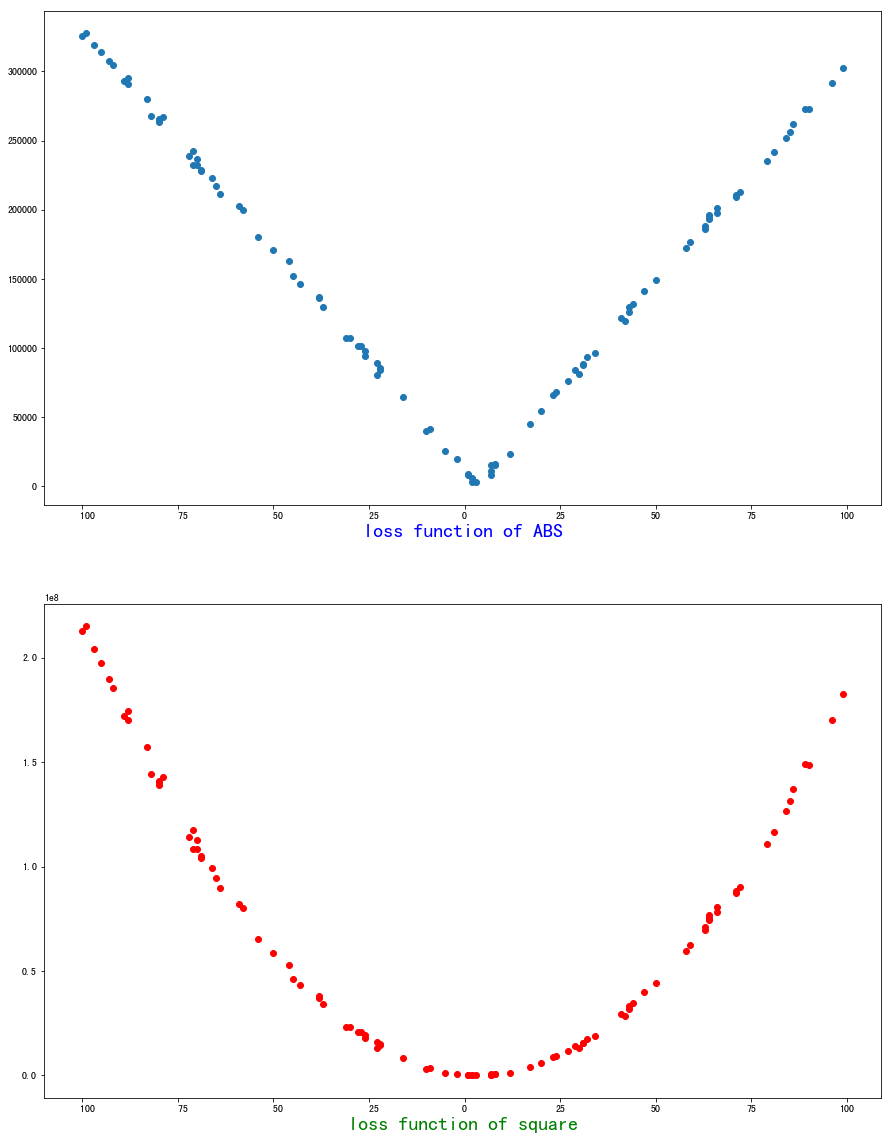

In [384]:
# 生成随机1000个斜率值
theta = np.random.randint(-100,100,100).reshape(100,1)
theta_0 = np.random.randint(-10,10,100).reshape(100,1)
predict_matrix = theta * X_rm.reshape(1,506) + theta_0
# y_hat_list = theta * x for x in X_rm
y = data['target'].reshape(1, 506)
predict_matrix_square = np.sum(np.square(predict_matrix - y), axis=1) / len(y)
predict_matrix_abs = np.sum(np.abs(predict_matrix - y), axis=1) / len(y)
# temp_loss = list(map(loss, y, y_hat))
# print(temp_loss)
plt.figure(figsize=(15,20))
plt.subplot(211)
plt.xlabel('loss function of ABS', fontsize=20, color='blue')
plt.scatter(theta, predict_matrix_abs)

plt.subplot(212)
plt.xlabel('loss function of square', fontsize=20, color='green')
plt.scatter(theta, predict_matrix_square, color='red')
plt.show()

In [387]:
print(min(predict_matrix_abs))
print(min(predict_matrix_square))

2975.163
34976.208623


In [ ]:
predict_matrix_abs = np.sum(np.abs(predict_matrix - y), axis=1) / len(y)

In [368]:
np.abs([1,-2,-3])

array([1, 2, 3])

In [357]:
predict_matrix_new.min()

31987.291152

In [319]:
new_x = X_rm.reshape(1,506)

In [338]:
np.square([1,2,3,4])

array([ 1,  4,  9, 16], dtype=int32)

In [ ]:
a = [1,2,3]
b = [3,3,4]
list(map(lambda x, y: x+y, a, b))
list(a) == a
list(zip(list(y), list(y_hat)))

In [235]:
np.random.randn(1,506)[0][2]
# np.random.normal(loc=0.5, scale=10, size=1000)

-0.2301209657334282

In [259]:
a = np.random.randn(2,3)
b = np.random.randn(2,3)

In [264]:
a * b

array([[ 0.17038232,  1.66883976, -0.40836423],
       [-1.14419864, -2.15548865,  0.20372078]])

## First-Method: Random generation: get best k and best b

In [395]:
data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [416]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [424]:
tst = np.arange(0, 60, 10).reshape(6,1) + np.arange(6).reshape(1,6)
tst

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [426]:
tst[[0,1,2,3,4],[1,2,3,4,5]]

array([ 1, 12, 23, 34, 45])

In [428]:
tst[3:, [0,2,5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [430]:
mask=np.array([1,0,1,0,0,1], dtype=bool)
mask

array([ True, False,  True, False, False,  True])

In [432]:
tst[mask, 2]

array([ 2, 22, 52])

In [436]:
tst[tst % 2 == 0] = -1
tst

array([[-1,  1, -1,  3, -1,  5],
       [-1, 11, -1, 13, -1, 15],
       [-1, 21, -1, 23, -1, 25],
       [-1, 31, -1, 33, -1, 35],
       [-1, 41, -1, 43, -1, 45],
       [-1, 51, -1, 53, -1, 55]])

In [442]:
trying_times = 3000

min_loss = float('inf')
best_k, best_b = None, None

k = 1000
b = 1000

for i in range(trying_times):
    
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    k = random.random() * 200 - 100 
    b = random.random() * 200 - 100
    

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 27.935594815369996 best_b: -78.06280611961012, and the loss is: 28862161636.340004
When time is : 1, get best_k: 2.58038324492054 best_b: -4.305724999019688, and the loss is: 3535350.8565728813
When time is : 2, get best_k: 50.26674518084343 best_b: -77.40650184461143, and the loss is: 92034.33585162999
When time is : 58, get best_k: 69.93954853217653 best_b: 30.10250380272811, and the loss is: 91809.00945644031
When time is : 72, get best_k: -56.874460062115986 best_b: 95.78744743339979, and the loss is: 46725.653938345706
When time is : 498, get best_k: 84.24343112555741 best_b: -78.91548900961325, and the loss is: 44160.14414692149
When time is : 636, get best_k: -6.4048282845113675 best_b: 25.863678543643815, and the loss is: 42726.0494709162
When time is : 1740, get best_k: 33.540273121991646 best_b: -27.503853521637893, and the loss is: 42718.773585780975


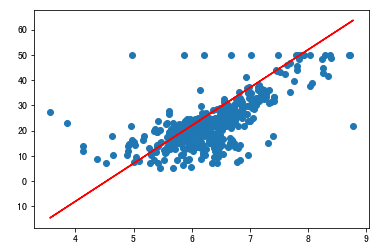

In [180]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.plot(X_rm, price_by_random_k_and_b, color='red')

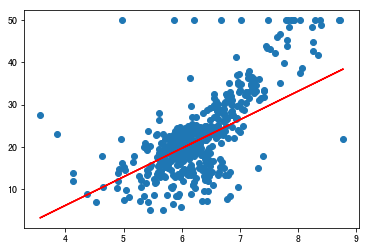

In [181]:
X_rm = X[:, 5]
k = 6.77
b = -21
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.plot(X_rm, price_by_random_k_and_b, color='red')

## 2nd-Method: Direction Adjusting

In [ ]:
trying_times = 2000

min_loss = float('inf')

# best_k = random.random() * 200 - 100
# best_b = random.random() * 200 - 100

best_k = 1000
best_b = 1000

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 1

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：

#### 找对改变的方向

#### 如何找对改变的方向呢？ 

#### 2nd-method: 监督让他变化--> 监督学习

## 导数

In [357]:
loss([1, 1, 1], [2, 2, 3])

2.0

In [358]:
loss([1, 1, 1], [1, 1, 1])

0.0

In [289]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [359]:
test = np.random.normal(loc=0.5, scale=.4, size=100)

In [365]:
test.reshape(100,1)
test.rows

AttributeError: 'numpy.ndarray' object has no attribute 'rows'